In [2]:
import numpy as np

from rdkit import Chem
# suppress rdkit warning
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style("whitegrid")

# ChirBase

## 1. Atom Type & Number Distribution (before preprocessing)

In [2]:
suppl = Chem.SDMolSupplier("./Chirality/chirbase.sdf")
mols = [x for x in suppl if x is not None]

In [3]:
csp_no = {}

for mol in mols: 
    if mol.HasProp('csp_no'):
        mb = mol.GetProp('csp_no')
    else: 
        mb = 'unknown'
    
    if mb in csp_no.keys(): 
        csp_no[mb] += 1
    else:
        csp_no[mb] = 1

In [4]:
scp_no_df = pd.DataFrame.from_dict(csp_no, orient='index')

scp_no_df.reset_index(inplace=True)
scp_no_df = scp_no_df.rename(columns = {0: "mol_num", 'index': 'csp_no'})
scp_no_df = scp_no_df.sort_values(by=['mol_num'])

In [5]:
scp_no_df

,csp_no,mol_num
317,5615,1
442,90601,1
306,90472,1
634,90765,1
1298,39228,1
...,...,...
743,90879,2965
217,45167,5209
56,90246,6914
8,23735,16909


In [6]:
scp_no_df[-20:]

,csp_no,mol_num
934,91027,894
220,4297,909
1016,91119,917
565,90704,918
1221,91423,1201
0,2,1209
234,90357,1224
1327,91518,1277
176,3575,1396
892,15723,1679


In [7]:
len(scp_no_df[scp_no_df['mol_num']>200])

60

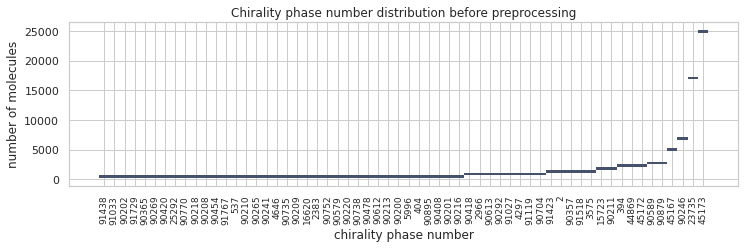

In [8]:
# plot
fig, ax = plt.subplots()
fig.set_size_inches(12, 3)

sns.histplot(data=scp_no_df[scp_no_df['mol_num']>200], x='csp_no', y='mol_num', ax=ax)
plt.xticks(rotation=90, fontsize=9)
plt.xlabel("chirality phase number")
plt.ylabel("number of molecules")
plt.title("Chirality phase number distribution before preprocessing")

plt.savefig('./csp_no_stat.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# ATOM_LIST = ['C', 'H', 'O', 'N', 'F', 'S', 'Cl', 'P', 'B', 'Br', 'I']
atom_type_dict = {}
atom_num_dict = {}

for mb in scp_no_df[scp_no_df['mol_num']>200]['csp_no'].tolist():
    for mol in mols: 
        if mol.HasProp('csp_no'):
            mb_i = mol.GetProp('csp_no')
        else: 
            mb_i = 'unknown'
        
        if mb_i != mb:
            continue
        
        # update atom_type_dict
        mol_h = Chem.AddHs(mol)
        for atom in mol_h.GetAtoms():
            atom_sym = atom.GetSymbol()
            
            if mb in atom_type_dict.keys(): 
                if atom_sym in atom_type_dict[mb].keys(): 
                    atom_type_dict[mb][atom_sym] += 1
                else:
                    atom_type_dict[mb][atom_sym] = 1
            else: 
                atom_type_dict[mb] = {atom_sym: 1}
                
        # update atom_num_dict
        if mb in atom_num_dict.keys():
            atom_num_dict[mb].append(len(mol.GetAtoms()))
        else:
            atom_num_dict[mb] = [len(mol.GetAtoms())]

In [10]:
atom_type_dict

{'91438': {'C': 2801,
  'N': 294,
  'O': 557,
  'Cl': 110,
  'H': 2655,
  'S': 48,
  'F': 77,
  'Br': 3,
  'I': 6,
  'P': 1},
 '91033': {'N': 381,
  'C': 3973,
  'O': 784,
  'H': 4791,
  'F': 4,
  'Br': 1,
  'Cl': 6,
  'S': 3,
  'P': 1},
 '90202': {'C': 4188,
  'O': 953,
  'H': 5173,
  'N': 442,
  'S': 120,
  'P': 146,
  'Cl': 58,
  'Br': 1,
  'Se': 1,
  'Si': 1},
 '91729': {'C': 1937,
  'N': 260,
  'O': 571,
  'H': 2888,
  'Cl': 10,
  'F': 12,
  'S': 15,
  'Br': 2},
 '90365': {'C': 3472,
  'O': 488,
  'H': 3303,
  'N': 62,
  'Cl': 57,
  'F': 86,
  'Br': 10},
 '90269': {'N': 583,
  'C': 5002,
  'O': 1255,
  'H': 6868,
  'Cl': 38,
  'Br': 2,
  'F': 4,
  'S': 22,
  'P': 9},
 '90420': {'C': 3291,
  'O': 595,
  'H': 3716,
  'N': 46,
  'Cl': 22,
  'Br': 12,
  'S': 19,
  'F': 34},
 '25292': {'C': 2562,
  'O': 506,
  'N': 398,
  'H': 3446,
  'S': 91,
  'F': 44,
  'Cl': 4},
 '90770': {'N': 207,
  'C': 4013,
  'O': 682,
  'H': 3983,
  'F': 68,
  'Cl': 46,
  'Br': 4,
  'I': 4,
  'S': 4},
 '90218

In [11]:
all_atom_type_dict = {}
for mb, stat in atom_type_dict.items():
    for atom_sym, cnt in stat.items():
        if atom_sym in all_atom_type_dict.keys():
            all_atom_type_dict[atom_sym] += cnt
        else:
            all_atom_type_dict[atom_sym] = cnt

In [12]:
all_atom_type_dict

{'C': 1511213,
 'N': 112996,
 'O': 256819,
 'Cl': 15733,
 'H': 1742556,
 'S': 16495,
 'F': 18240,
 'Br': 3353,
 'I': 572,
 'P': 3821,
 'Se': 235,
 'Si': 1599,
 'B': 331,
 'Na': 14,
 'Sn': 65,
 'Os': 1,
 '*': 3,
 'Zn': 1,
 'Au': 1,
 'Pt': 2,
 'Pd': 1,
 'Zr': 1}

In [13]:
atom_num_dict

{'91438': [21,
  26,
  31,
  30,
  21,
  40,
  20,
  21,
  26,
  20,
  20,
  26,
  26,
  15,
  15,
  23,
  16,
  24,
  24,
  24,
  24,
  23,
  27,
  27,
  22,
  22,
  22,
  22,
  22,
  12,
  15,
  19,
  19,
  29,
  14,
  14,
  11,
  11,
  11,
  14,
  20,
  12,
  18,
  11,
  11,
  12,
  10,
  12,
  13,
  13,
  26,
  21,
  21,
  20,
  20,
  10,
  13,
  10,
  10,
  20,
  25,
  25,
  25,
  16,
  13,
  22,
  17,
  12,
  18,
  12,
  14,
  13,
  20,
  12,
  10,
  20,
  13,
  29,
  29,
  12,
  13,
  14,
  26,
  26,
  26,
  26,
  20,
  14,
  15,
  12,
  15,
  15,
  10,
  12,
  16,
  19,
  20,
  14,
  11,
  20,
  20,
  14,
  12,
  33,
  24,
  23,
  22,
  11,
  12,
  14,
  18,
  13,
  16,
  19,
  13,
  17,
  15,
  20,
  20,
  14,
  16,
  27,
  17,
  22,
  17,
  16,
  22,
  20,
  19,
  14,
  25,
  21,
  15,
  16,
  32,
  35,
  23,
  26,
  10,
  16,
  21,
  12,
  13,
  14,
  8,
  9,
  17,
  17,
  19,
  18,
  11,
  19,
  18,
  26,
  24,
  21,
  21,
  21,
  21,
  22,
  22,
  13,
  16,
  16,
  19,
  1

In [14]:
avg_atom_num_dict = {}
for mb, atom_nums in atom_num_dict.items():
    avg_atom_num_dict[mb] = np.mean(np.array(atom_nums))

In [15]:
avg_atom_num_dict

{'91438': 19.19704433497537,
 '91033': 24.893719806763286,
 '90202': 26.863636363636363,
 '91729': 12.475555555555555,
 '90365': 17.395833333333332,
 '90269': 28.574380165289256,
 '90420': 16.53909465020576,
 '25292': 14.774590163934427,
 '90770': 19.79527559055118,
 '90218': 20.13953488372093,
 '90208': 17.655038759689923,
 '90454': 22.50943396226415,
 '91767': 14.955056179775282,
 '537': 26.423220973782772,
 '90210': 16.028985507246375,
 '90265': 27.45774647887324,
 '90241': 21.898954703832754,
 '4646': 21.33783783783784,
 '90735': 17.986798679867988,
 '90209': 17.480645161290322,
 '16620': 23.890577507598785,
 '2383': 20.16417910447761,
 '90752': 20.01123595505618,
 '90579': 10.786703601108034,
 '90220': 21.046272493573266,
 '90738': 19.727493917274938,
 '90478': 20.814457831325303,
 '90612': 20.897025171624716,
 '90213': 23.047727272727272,
 '90200': 19.129175946547885,
 '5996': 22.243697478991596,
 '404': 21.2552783109405,
 '90895': 22.051724137931036,
 '90408': 18.46766169154229,

## 2. CSPs Distribution (after preprocessing)

In [16]:
suppl = Chem.SDMolSupplier("./Chirality/chirbase_clean.sdf")
mols = [x for x in suppl if x is not None]

In [17]:
def convert2cls(chir, csp_category): 
    if csp_category == '1': 
        # For polysaccharide CSPs:
        if chir < 1.15:
            y = 0
        elif chir < 1.2:
            y = 1
        elif chir < 2.1:
            y = 2
        else:
            y = 3
    elif csp_category == '2': 
        # For Pirkle CSPs:
        if chir < 1.05: 
            y = 0
        elif chir < 1.15:
            y = 1
        elif chir < 2: 
            y = 2
        else:
            y = 3
    else:
        raise Exception("The category for CSP should be 1 or 2, rather than {}.".format(csp_category))
    return y

In [18]:
csp_no = {}
csp_no_stat = {}

for mol in mols: 
    if mol.HasProp('csp_no'):
        mb = mol.GetProp('csp_no')
    else:
        mb = 'unknown'
    chir = round(float(mol.GetProp('k2/k1')), 4)
    y = convert2cls(chir, mol.GetProp('mobile_phase_category'))
        
    if mb in csp_no_stat.keys(): 
        csp_no[mb] += 1
        if y in csp_no_stat[mb].keys():
            csp_no_stat[mb][y] += 1
        else:
            csp_no_stat[mb][y] = 1 
    else:
        csp_no[mb] = 1
        csp_no_stat[mb] = {y: 1}

In [19]:
csp_no

{'2': 1202,
 '45173': 24234,
 '23735': 16531,
 '44869': 2315,
 '90211': 1945,
 '394': 2176,
 '90246': 6768,
 '3575': 1396,
 '45167': 5122,
 '90357': 1224,
 '90589': 2677,
 '90704': 918,
 '90879': 2963,
 '15723': 1677,
 '91119': 917,
 '45172': 2306,
 '91423': 1168,
 '91518': 1256}

In [20]:
csp_no_stat

{'2': {0: 944, 2: 169, 1: 87, 3: 2},
 '45173': {3: 2461, 2: 15258, 0: 1758, 1: 4757},
 '23735': {1: 3554, 2: 10329, 0: 1258, 3: 1390},
 '44869': {2: 1473, 1: 347, 0: 323, 3: 172},
 '90211': {0: 430, 2: 940, 1: 507, 3: 68},
 '394': {2: 1370, 0: 399, 1: 190, 3: 217},
 '90246': {3: 587, 2: 4034, 0: 785, 1: 1362},
 '3575': {2: 779, 0: 257, 3: 193, 1: 167},
 '45167': {2: 3416, 0: 475, 3: 452, 1: 779},
 '90357': {1: 514, 2: 339, 0: 356, 3: 15},
 '90589': {3: 396, 2: 1416, 1: 579, 0: 286},
 '90704': {3: 62, 2: 353, 1: 283, 0: 220},
 '90879': {1: 563, 3: 594, 2: 1341, 0: 465},
 '15723': {3: 319, 1: 199, 2: 852, 0: 307},
 '91119': {3: 130, 2: 341, 0: 200, 1: 246},
 '45172': {3: 319, 2: 1196, 1: 192, 0: 599},
 '91423': {3: 119, 2: 658, 1: 252, 0: 139},
 '91518': {0: 323, 2: 714, 3: 86, 1: 133}}

In [21]:
len(csp_no)

18

In [22]:
csp_no_sorted = sorted(csp_no.items(), key=lambda x:x[1])

In [23]:
[item[0] for item in csp_no_sorted[-20:]]

['91119',
 '90704',
 '91423',
 '2',
 '90357',
 '91518',
 '3575',
 '15723',
 '90211',
 '394',
 '45172',
 '44869',
 '90589',
 '90879',
 '45167',
 '90246',
 '23735',
 '45173']

In [24]:
csp_no_clean = {}

for k, v in csp_no.items():
    if v < 200: 
        continue
    else:
        csp_no_clean[k] = v

In [25]:
scp_no_df = pd.DataFrame.from_dict(csp_no_clean, orient='index')

scp_no_df.reset_index(inplace=True)
scp_no_df = scp_no_df.rename(columns = {0: "mol_num", 'index': 'csp_no'})
scp_no_df = scp_no_df.sort_values(by=['mol_num'])

In [26]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [27]:
print_full(scp_no_df)

   csp_no  mol_num
14  91119      917
11  90704      918
16  91423     1168
0       2     1202
9   90357     1224
17  91518     1256
7    3575     1396
13  15723     1677
4   90211     1945
5     394     2176
15  45172     2306
3   44869     2315
10  90589     2677
12  90879     2963
8   45167     5122
6   90246     6768
2   23735    16531
1   45173    24234


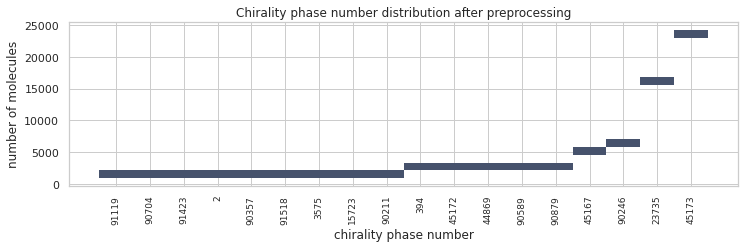

In [28]:
# plot
fig, ax = plt.subplots()
fig.set_size_inches(12, 3)

sns.histplot(data=scp_no_df, x='csp_no', y='mol_num', ax=ax)
plt.xticks(rotation=90, fontsize=9)
plt.xlabel("chirality phase number")
plt.ylabel("number of molecules")
plt.title("Chirality phase number distribution after preprocessing")

plt.savefig('./csp_no_stat_aft.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Compounds Distribution (after preprocessing)

In [ ]:
suppl = Chem.SDMolSupplier("./Chirality/chirbase_clean.sdf")
mols = [x for x in suppl if x is not None]

In [ ]:
df_dict = {'SMILES': [], 'MB': [], 'K1/K2': [], 'Y': []}

for mol in mols: 
    if mol.HasProp('csp_no'):
        mb = mol.GetProp('csp_no')
    else:
        mb = 'unknown'
    smiles = Chem.MolToSmiles(mol)
    chir = round(float(mol.GetProp('k2/k1')), 4)
    y = convert2cls(chir, mol.GetProp('mobile_phase_category'))
    
    df_dict['SMILES'].append(smiles)
    df_dict['K1/K2'].append(chir)
    df_dict['MB'].append(mb)
    df_dict['Y'].append(y)

df = pd.DataFrame.from_dict(df_dict)

In [ ]:
df.pivot(index='SMILES', columns='MB', values='Y')

The same compound in the same CSP, but has different category? 

In [ ]:
df_tmp = df.sort_values(['SMILES', 'MB', 'K1/K2'], ascending=False).drop_duplicates(['SMILES', 'MB']).sort_index()

In [ ]:
df_uniq = df_tmp[df_tmp.duplicated(subset=['SMILES', 'MB', 'Y'])==False]
df_check = df_uniq[df_uniq.duplicated(subset=['SMILES', 'MB'])==True]

In [ ]:
df_uniq = df[df.duplicated(subset=['SMILES', 'MB', 'Y'])==False]
df_check = df_uniq[df_uniq.duplicated(subset=['SMILES', 'MB'])==True]

In [ ]:
df_uniq

In [ ]:
df_check

In [ ]:
df_uniq[df_uniq['SMILES']=='O=C(N[C@H]1CC2CCC1C2)c1ccccc1']

In [ ]:
df_uniq[df_uniq['SMILES']=='FC(F)(F)CN1CCC[C@H]1c1cccnc1']

In [ ]:
df_uniq[df_uniq['SMILES']=='c1ccc(CN2CCC[C@H]2c2cccnc2)cc1']

In [ ]:
df_uniq[df_uniq['SMILES']=='CC(C)C[C@H](CO)NC(=O)COc1ccc2c(=O)c3ccccc3oc2c1']

In [ ]:
df_uniq[df_uniq['SMILES']=='C=CCOc1ccccc1OC[C@@H](O)CNC(C)C']

In [ ]:
pd.unique(df_check['MB'].values)

In [ ]:
df_check.groupby(['SMILES', 'MB']).size()

In [ ]:
df_check.groupby(['SMILES', 'MB']).size().idxmax()

# CMRT

## 1. compound numbers of CSPs (all)

In [3]:
df_rt = pd.read_csv('../data/CMRT/cmrt_all_column.csv', index_col=0)

df_rt['isomer_SMILES'] = df_rt['SMILES']
df_rt['SMILES'] = df_rt['SMILES'].apply(lambda x: Chem.MolToSmiles(Chem.MolFromSmiles(x), isomericSmiles=False))

# df_rt = df_rt.sort_values(['index', 'RT'], ascending=False)

df_rt = df_rt[df_rt['RT'] != 0]
df_rt = df_rt.groupby(['index']).filter(lambda x: len(x) == 2)

In [6]:
len(df_rt)

23438

In [5]:
df_rt.groupby(['Column']).size()

Column
AD      584
AD3     564
ADH    4884
AS      312
ASH    1068
AZ      344
IA     1610
IAH      72
IAU      54
IB      600
IC     1862
IC3     954
ICH     216
ID      534
IE      920
IF      442
IF3     158
IG      234
OD      356
OD3     742
ODH    4520
OJ      222
OJ3     264
OJH    1710
OZ3     212
dtype: int64